<a href="https://colab.research.google.com/github/Deadpool4099/MachineLearning/blob/main/Intership_Studio_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Adview Predictions Project in Python**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data=pd.read_csv('train.csv')

In [ ]:
Data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [ ]:
Data.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [ ]:
Data.shape

(14999, 9)

In [ ]:
def func(X):
  Y=X[2:]
  h=''
  m=''
  s=''
  mm=''
  P=['H','M','S']
  for i in Y:
    if i not in P:
      mm+=i
    else:
      if(i=='H'):
        h=mm
        mm=''
      elif(i=='M'):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if(h==''):
    h='00'
  if(m==''):
    m='00'
  if(s==''):
    s='00'
  bp=h+':'+m+':'+s
  return bp




  


In [ ]:
mp=Data['duration']
time=mp.apply(func)

In [ ]:

def sec(sec):
  h,m,s=sec.split(':')
  a=int(h)*3600+int(m)*60+int(s)*1
  return a

time1=time.apply(sec)

Data['duration']=time1
Data.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,F
1,VID_14135,2,1707,56,2,6,2016-10-01,570,D
2,VID_2187,1,2023,25,0,2,2016-07-02,136,C
3,VID_23096,6,620860,777,161,153,2016-07-27,262,H
4,VID_10175,1,666,1,0,0,2016-06-29,31,D


In [ ]:
Data=Data[Data.views!='F']
Data=Data[Data.likes!='F']
Data=Data[Data.dislikes!='F']
Data=Data[Data.comment!='F']

In [ ]:
Data.tail(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
14987,VID_18084,1,303879,481,51,76,2014-06-12,137,F
14988,VID_22836,2,214596,1431,44,67,2015-08-06,212,G
14989,VID_20638,22,1204587,10284,379,2016,2013-04-10,36019,G
14992,VID_11653,1,78021,422,19,14,2016-08-12,177,D
14993,VID_13909,11,96816,122,9,11,2014-01-30,126,D
14994,VID_31,2,525949,1137,83,86,2015-05-18,370,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,236,D
14996,VID_805,4,3479,16,1,1,2013-08-23,193,B
14997,VID_19843,1,963,0,0,0,2010-10-02,26,G
14998,VID_8534,1,15212,22,5,4,2016-02-19,61,D


In [ ]:
Data.shape

(14637, 9)

In [ ]:
Data['views']=pd.to_numeric(Data['views'])
Data['likes']=pd.to_numeric(Data['likes'])
Data['dislikes']=pd.to_numeric(Data['dislikes'])
Data['comment']=pd.to_numeric(Data['comment'])

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  int64 
 8   category   14637 non-null  object
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
Data["category"]=Data["category"].map(category)
Data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,457,6
1,VID_14135,2,1707,56,2,6,2016-10-01,570,4
2,VID_2187,1,2023,25,0,2,2016-07-02,136,3
3,VID_23096,6,620860,777,161,153,2016-07-27,262,8
4,VID_10175,1,666,1,0,0,2016-06-29,31,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
Data['published']=LabelEncoder().fit_transform(Data['published'])
Data['vidid']=LabelEncoder().fit_transform(Data['vidid'])
Data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


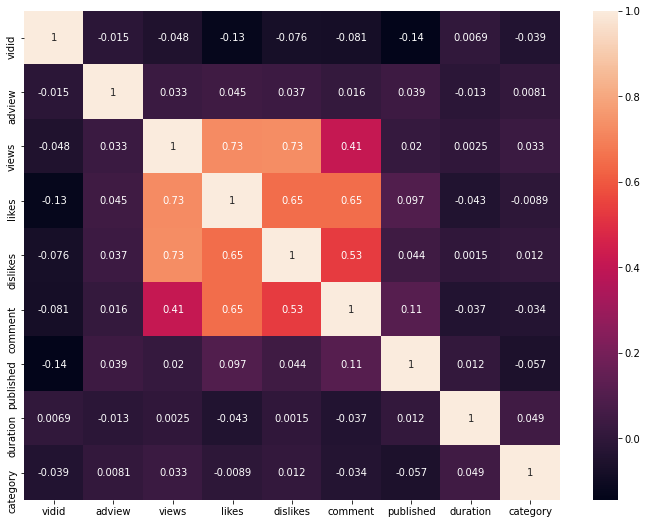

In [ ]:
cor_matrix=Data.corr().round(4)
plt.subplots(figsize=(12,9))
sns.heatmap(data=cor_matrix,annot=True)

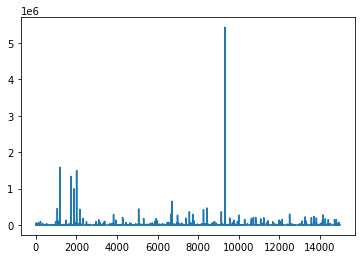

In [ ]:
plt.plot(Data['adview'])
plt.show()

In [ ]:
a=max(Data['adview'])
print(a)

5429665


In [ ]:
Data=Data[Data['adview']<3000000]

In [ ]:
Data.shape

(14636, 9)

In [ ]:
x=Data[['views','likes','published']].values
y=Data['adview'].values
x,y

(array([[1031602,    8523,    2168],
        [   1707,      56,    2185],
        [   2023,      25,    2094],
        ...,
        [   3479,      16,    1053],
        [    963,       0,     222],
        [  15212,      22,    1960]]), array([40,  2,  1, ...,  4,  1,  1]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalerx=MinMaxScaler()
x=scalerx.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape

(11708, 3)

In [ ]:
x_train.mean()

0.22133679869856437

In [ ]:
from sklearn import metrics
def print_error(x_test,y_test,model_name):
  y_pred=model_name.predict(x_test)
  print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
  print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
  print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred))) 

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(x_train,y_train)
print_error(x_test,y_test,linear_regression)

Mean Absolute Error: 3916.928991732439
Mean Squared Error: 1370085228.2710772
Root Mean Squared Error: 37014.66234171369


In [ ]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
print_error(x_test,y_test,svr)

Mean Absolute Error: 2321.6727370906847
Mean Squared Error: 1375895906.8262146
Root Mean Squared Error: 37093.07087349623


In [ ]:
from sklearn.tree import DecisionTreeRegressor
decission_tree_regressor=DecisionTreeRegressor(max_depth=100)
decission_tree_regressor.fit(x_train,y_train)
print_error(x_test,y_test,decission_tree_regressor)

Mean Absolute Error: 2942.054132513661
Mean Squared Error: 1441108358.171875
Root Mean Squared Error: 37961.933014164


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=200,max_depth = 25,min_samples_split=15,min_samples_leaf=2)
RFR.fit(x_train,y_train)
print_error(x_test,y_test,RFR)

Mean Absolute Error: 2996.92982438284
Mean Squared Error: 1354828288.9994454
Root Mean Squared Error: 36807.99218918964


In [ ]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                               Dense(6, activation="relu",
                               input_shape=x_train.shape[1:]),
                               Dense(6,activation="relu"),
                               Dense(1)
                               ])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(x_train,y_train,epochs=100)
ann.summary()
print_error(x_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 0s 773us/step - loss: 631802880.0000 - mean_squared_error: 631802880.0000
Epoch 2/100
366/366 [==============================] - 0s 786us/step - loss: 631798336.0000 - mean_squared_error: 631798336.0000
Epoch 3/100
366/366 [==============================] - 0s 783us/step - loss: 631790464.0000 - mean_squared_error: 631790464.0000
Epoch 4/100
366/366 [==============================] - 0s 793us/step - loss: 631778048.0000 - mean_squared_error: 631778048.0000
Epoch 5/100
366/366 [==============================] - 0s 753us/step - loss: 631760832.0000 - mean_squared_error: 631760832.0000
Epoch 6/100
366/366 [==============================] - 0s 759us/step - loss: 631737792.0000 - mean_squared_error: 631737792.0000
Epoch 7/100
366/366 [==============================] - 0s 779us/step - loss: 631710272.0000 - mean_squared_error: 631710272.0000
Epoch 8/100
366/366 [==============================] - 0s 752us/step - loss: 631677632.0000 - mea

In [ ]:
Test_Data=pd.read_csv('test.csv')

In [ ]:
Test_Data

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [ ]:
Test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


In [ ]:
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
Test_Data["category"]=Test_Data["category"].map(category)
Test_Data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [ ]:
mp_test=Test_Data['duration']
time_test=mp_test.apply(func)
time1_test=time_test.apply(sec)


In [ ]:
Test_Data['duration']=time1_test
Test_Data.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,449,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,389,6
2,VID_13967,28534,31,11,1,2014-03-10,2274,4
3,VID_19442,1316715,2284,250,274,2010-06-05,595,7
4,VID_770,1893173,2519,225,116,2016-09-03,188,2


In [ ]:
Test_Data.shape

(8764, 8)

In [ ]:
Test_Data=Test_Data[Test_Data.views!='F']
Test_Data=Test_Data[Test_Data.likes!='F']


In [ ]:
Test_Data.shape

(8675, 8)

In [ ]:
Test_Data['views']=pd.to_numeric(Test_Data['views'])
Test_Data['likes']=pd.to_numeric(Test_Data['likes'])


In [ ]:
from sklearn.preprocessing import LabelEncoder
Test_Data['published']=LabelEncoder().fit_transform(Test_Data['published'])
Test_Data['vidid']=LabelEncoder().fit_transform(Test_Data['vidid'])
Test_Data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3488,1040132,8171,340,1047,1825,389,6
2,1618,28534,31,11,1,1009,2274,4
3,3819,1316715,2284,250,274,116,595,7
4,7765,1893173,2519,225,116,1892,188,2


In [ ]:
Test=Test_Data[['views','likes','published']].values


In [ ]:
Test_Sc=scalerx.fit_transform(Test)

In [ ]:
Test_Sc

array([[1.95520958e-03, 1.92237996e-02, 9.75296912e-01],
       [4.61965571e-03, 2.55286311e-02, 8.66983373e-01],
       [1.26614645e-04, 9.68532080e-05, 4.79334917e-01],
       ...,
       [8.40188347e-03, 1.43905121e-02, 8.66033254e-01],
       [3.17494650e-03, 5.12072284e-03, 8.20902613e-01],
       [2.34068537e-05, 3.74915644e-05, 9.48218527e-01]])

In [ ]:
Test_Sc.shape

(8675, 3)

In [ ]:
predictions1=RFR.predict(Test_Sc)

In [ ]:
predictions2=linear_regression.predict(Test_Sc)

In [ ]:
predictions3=decission_tree_regressor.predict(Test_Sc)

In [ ]:
print(predictions3.min(),predictions3.max(),predictions3.mean())

1.0 991819.0 1258.7544668587896


In [ ]:
predictions4=svr.predict(Test_Sc)

In [ ]:
predictions4

array([2.81294839, 2.45132679, 1.83121315, ..., 2.36896221, 1.62811474,
       2.08131873])

In [ ]:
predictions5=ann.predict(Test_Sc).reshape(1,8675)

In [ ]:
predictions5

array([[2064.6453, 1939.8175, 1469.8761, ..., 1937.6201, 1878.1088,
        2025.5319]], dtype=float32)

In [ ]:
print(predictions5.min(),predictions5.max(),predictions5.mean())

903.192 2729.8462 1644.8905


In [ ]:
A=pd.DataFrame({'LR':predictions2,'RFR':predictions1,'DTR':predictions3,'SVR':predictions4})

In [ ]:
A.head(50)

,LR,RFR,DTR,SVR
0,3242.214308,83.602848,446.0,2.812948
1,2566.708168,2161.929824,4.0,2.451327
2,584.107664,67.465012,1.0,1.831213
3,-1892.263177,253.253517,13.0,2.174460
4,3101.151710,8.679811,9.0,2.372081
5,463.638184,2.864989,3.0,1.968012
6,718.275420,5.985134,1.0,1.736469
7,2896.806600,2329.366359,1.0,1.571873
8,406.741911,12.578882,2.0,2.290712
9,2751.238767,3795.668294,2.0,2.351830


In [ ]:
# These are Predictions done by DecissionTreeRegressor.
predictions=pd.DataFrame({'The Predictions':predictions3})
predictions.to_csv('Predictions.csv')

In [ ]:
predictions.mean()

The Predictions    1258.754467
dtype: float64

In [ ]:
predictions.min()

The Predictions    1.0
dtype: float64

In [ ]:
predictions.max()

The Predictions    991819.0
dtype: float64